In [31]:
#Handling missing data

In [32]:
import seaborn as sns

In [33]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [34]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [35]:
df.shape

(891, 15)

In [36]:
df.dropna().shape # drops row wise


(182, 15)

In [37]:
df.dropna(axis=1).shape #drop the columns that has missing values

(891, 11)

## Imputation Missing Values
### 1- Mean Value Imputation

<AxesSubplot:xlabel='age', ylabel='Count'>

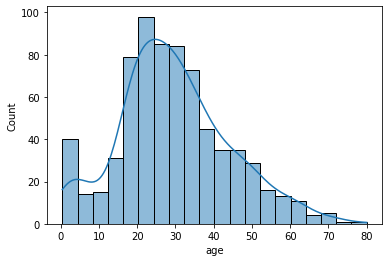

In [38]:
sns.histplot(df['age'], kde=True)

In [39]:
import numpy as np

In [40]:
df['age_mean']=df['age'].fillna(df['age'].mean())

In [41]:
df[['age_mean', 'age']]

,age_mean,age
0,22.000000,22.0
1,38.000000,38.0
2,26.000000,26.0
3,35.000000,35.0
4,35.000000,35.0
...,...,...
886,27.000000,27.0
887,19.000000,19.0
888,29.699118,NaN
889,26.000000,26.0


### 2. Median Value Imputation- If we have outliers in the dataset

In [42]:
df['age_median'] = df['age'].fillna(df['age'].median())

In [43]:
df[['age_mean', 'age_median', 'age']]

,age_mean,age_median,age
0,22.000000,22.0,22.0
1,38.000000,38.0,38.0
2,26.000000,26.0,26.0
3,35.000000,35.0,35.0
4,35.000000,35.0,35.0
...,...,...,...
886,27.000000,27.0,27.0
887,19.000000,19.0,19.0
888,29.699118,28.0,NaN
889,26.000000,26.0,26.0


### 3. Mode Imputation Technqiue--Categorical values

In [44]:
df[df['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mean,age_median
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0


In [45]:
mode=df[df['embarked'].notna()]['embarked'].mode()[0]
mode

'S'

In [46]:
df['embarked_mode']=df['embarked'].fillna(mode)

In [47]:
df[['embarked_mode','embarked']]

,embarked_mode,embarked
0,S,S
1,C,C
2,S,S
3,S,S
4,S,S
...,...,...
886,S,S
887,S,S
888,S,S
889,C,C


## Handling Imbalanced Dataset

1. Up Sampling
2. Down Sampling

In [18]:
import numpy as np #Code A
import pandas as pd

np.random.seed(123) #Code B

n_samples = 1000
class_0_ratio = 0.9
n_class_0 = int(n_samples * class_0_ratio)
n_class_1 = n_samples - n_class_0

n_class_0, n_class_1

(900, 100)

In [19]:
class_0_df = pd.DataFrame(
    {
        "feature_1": np.random.normal(loc=0, scale=1, size=n_class_0),
        "feature_2": np.random.normal(loc=0, scale=1, size=n_class_0),
        "target": [0]*n_class_0
    }
)

class_1_df = pd.DataFrame(
    {
        "feature_1": np.random.normal(loc=0, scale=1, size=n_class_1),
        "feature_2": np.random.normal(loc=0, scale=1, size=n_class_1),
        "target": [1]*n_class_1
    }
)

In [21]:
df = pd.concat([class_0_df, class_1_df]).reset_index(drop="True")
df.head()

,feature_1,feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0


In [22]:
df["target"].value_counts()

0    900
1    100
Name: target, dtype: int64

In [23]:
df_minority = df[df['target']==1]
df_majority = df[df['target']==0]

In [25]:
#upsampling
from sklearn.utils import resample
df_minority_upsampled=resample(df_minority, replace=True, 
                    n_samples=len(df_majority), random_state=42)

In [27]:
df_minority_upsampled.shape

(900, 3)

In [28]:
df_minority_upsampled.head()

,feature_1,feature_2,target
951,-0.874146,-0.156083,1
992,0.196570,-0.602575,1
914,-0.067830,0.998053,1
971,0.272825,1.034197,1
960,0.870056,-0.449515,1


In [30]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
df_upsampled['target'].value_counts()

0    900
1    900
Name: target, dtype: int64

## Down Sampling

In [31]:
print(df['target'].value_counts())

0    900
1    100
Name: target, dtype: int64


In [32]:
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]

In [33]:
df_majority_downsampled=resample(df_majority, replace=True, 
                                    n_samples=len(df_minority), random_state=42)

In [35]:
df_majority_downsampled.shape #rows reduced or down sampled

(100, 3)

## SMOTE(Synthetic Minority Oversampling Technique)
SMOTE (Synthetic Minority Over-sampling Technique) is a technique used in machine learning to address imbalanced datasets where the minority class has significantly fewer instances than the majority class. SMOTE involves generating synthetic instances of the minority class by interpolating between existing instances.

In [2]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=1000, n_redundant=0, n_features=2, n_clusters_per_class=1
                            ,weights=[0.90], random_state=12)

In [3]:
import pandas as pd
df1=pd.DataFrame(X, columns=['f1', 'f2'])
df2=pd.DataFrame(y, columns=['target'])
final_df = pd.concat([df1, df2], axis=1)
final_df.head() 

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [4]:
final_df['target'].value_counts()

0    900
1    100
Name: target, dtype: int64

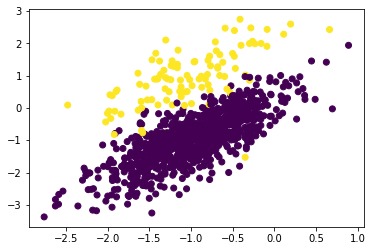

In [5]:
import matplotlib.pyplot as plt
plt.scatter(final_df['f1'],final_df['f2'],c=final_df['target'])

In [11]:
#!pip install imblearn

In [12]:
from imblearn.over_sampling import SMOTE

In [14]:
oversample = SMOTE()
X,y = oversample.fit_resample(final_df[['f1', 'f2']], final_df['target'])

X.shape, y.shape

((1800, 2), (1800,))

In [16]:
len(y[y==0]), len(y[y==1])

(900, 900)

In [21]:
oversample_df = pd.concat(
    [
        pd.DataFrame(X, columns=['f1', 'f2']),
        pd.DataFrame(y, columns=['target'])
    ]
    ,axis=1
)

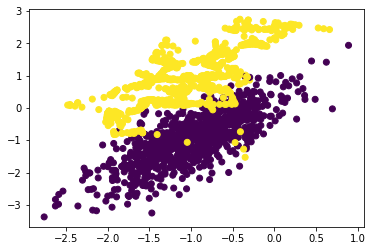

In [22]:
plt.scatter(oversample_df['f1'], oversample_df['f2'], c=oversample_df['target'])

## Data Interpolation
Data interpolation is the process of estimating unknown values within a dataset based on the known values. In Python, there are various libraries available that can be used for data interpolation, such as NumPy, SciPy, and Pandas. Here is an example of how to perform data interpolation using the NumPy library:

1. Linear Interpolation
2. Cubic Interpolation With Scipy
3. Polynomial Interpolation

## 1. Linear Interpolation

In [25]:
import numpy as np
x=np.array([1,2,3,4,5])
y=np.array([2,4,6,8,10])

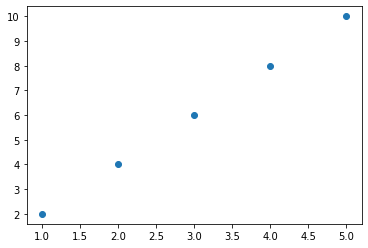

In [26]:
import matplotlib.pyplot as plt
plt.scatter(x, y)

In [29]:
#interpolation
x_new=np.linspace(min(x), max(x), 10)
y_interp = np.interp(x_new, x, y)

x, x_new, y, y_interp

(array([1, 2, 3, 4, 5]),
 array([1.        , 1.44444444, 1.88888889, 2.33333333, 2.77777778,
        3.22222222, 3.66666667, 4.11111111, 4.55555556, 5.        ]),
 array([ 2,  4,  6,  8, 10]),
 array([ 2.        ,  2.88888889,  3.77777778,  4.66666667,  5.55555556,
         6.44444444,  7.33333333,  8.22222222,  9.11111111, 10.        ]))

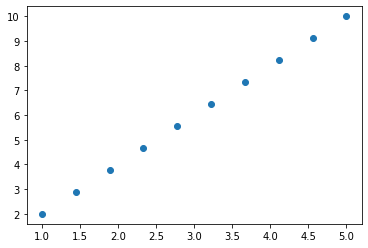

In [30]:
plt.scatter(x_new, y_interp)

## 2. Cubic Interpolation With Scipy

In [33]:
import numpy as np
x=np.array([1,2,3,4,5])
y=np.array(pow(x, 3))

x, y

(array([1, 2, 3, 4, 5]), array([  1,   8,  27,  64, 125], dtype=int32))

In [35]:
from scipy.interpolate import interp1d

In [36]:
f=interp1d(x,y, kind='cubic')

In [37]:
x_new=np.linspace(min(x), max(x), 10)
y_interp = f(x_new)

x_new, y_interp

(array([1.        , 1.44444444, 1.88888889, 2.33333333, 2.77777778,
        3.22222222, 3.66666667, 4.11111111, 4.55555556, 5.        ]),
 array([  1.        ,   3.01371742,   6.739369  ,  12.7037037 ,
         21.43347051,  33.45541838,  49.2962963 ,  69.48285322,
         94.54183813, 125.        ]))

<function matplotlib.pyplot.show(close=None, block=None)>

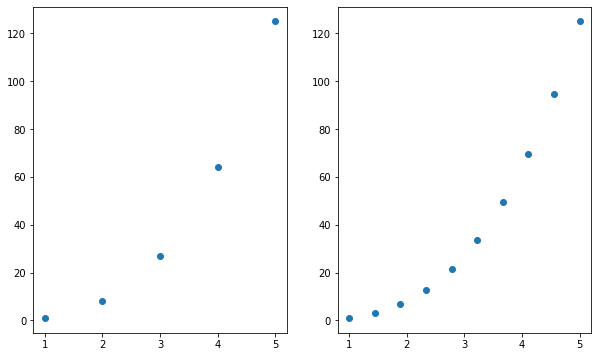

In [41]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.scatter(x, y)
plt.subplot(1,2,2)
plt.scatter(x_new, y_interp)
plt.show

## 3. Polynomial Interpolation

In [ ]:
import numpy as np

# create some sample data
x = np.array([1, 2, 3, 4, 5])
y = np.array([1, 4, 9, 16, 25])

In [43]:
# interpolate the data using polynomial interpolation
p=np.polyfit(x,y,2)
p

array([  9. , -23.6,  16.8])

In [44]:
x_new = np.linspace(1, 5, 10) # create new x values
y_interp = np.polyval(p, x_new)

x, x_new, y, y_interp

(array([1, 2, 3, 4, 5]),
 array([1.        , 1.44444444, 1.88888889, 2.33333333, 2.77777778,
        3.22222222, 3.66666667, 4.11111111, 4.55555556, 5.        ]),
 array([  1,   8,  27,  64, 125], dtype=int32),
 array([  2.2       ,   1.48888889,   4.33333333,  10.73333333,
         20.68888889,  34.2       ,  51.26666667,  71.88888889,
         96.06666667, 123.8       ]))

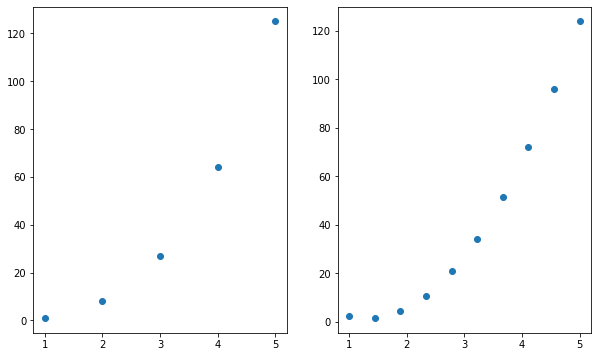

In [45]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.scatter(x, y)
plt.subplot(1,2,2)
plt.scatter(x_new, y_interp)

## 5 number Summary And Box Plot

In [49]:
lst_marks=[45,32,56,75,89,54,32,89,90,87,67,54,45,98,99,67,74]
minimum,q1,median,q3,maximum = np.quantile(lst_marks,[0, 0.25, 0.50, 0.75, 1])

minimum,q1,median,q3,maximum

(32.0, 54.0, 67.0, 89.0, 99.0)

In [51]:
iqr = q3-q1
iqr

35.0

In [53]:
lower_fence = q1-(1.5*iqr)
upper_fence = q3+(1.5*iqr)

lower_fence, upper_fence

(1.5, 141.5)

<AxesSubplot:>

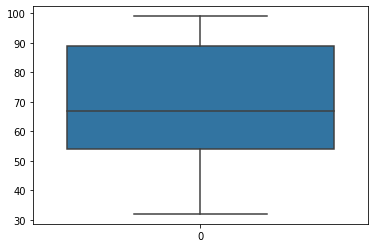

In [54]:
import seaborn as sns
sns.boxplot(lst_marks)

In [55]:
#adding outliers 
lst_marks=[-100,-200,45,32,56,75,89,54,32,89,90,87,67,54,45,98,99,67,74,150,170,180]

<AxesSubplot:>

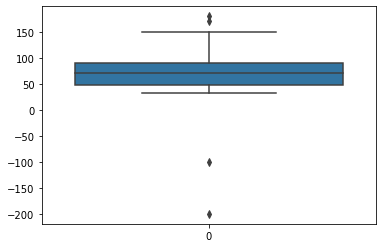

In [56]:
sns.boxplot(lst_marks)

In [58]:
minimum,q1,median,q3,maximum = np.quantile(lst_marks,[0, 0.25, 0.50, 0.75, 1])
iqr = q3-q1
lower_fence = q1-(1.5*iqr)
upper_fence = q3+(1.5*iqr)

lower_fence, upper_fence

(-16.5, 153.5)

## Feature Scaling

1. Standardization
2. Normalization-Min Max Scaler
3. Unit Vector

In [60]:
df=sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [62]:
import numpy as np
mean = np.mean(df['total_bill'])
std = np.std(df['total_bill'])

mean, std

(19.78594262295082, 8.884150577771132)

In [63]:
normalized_data=[]
for xi in list(df['total_bill']):
    z_score = (xi-mean)/std
    normalized_data.append(z_score)

normalized_data


[-0.3147113050904943,
 -1.0632353132988692,
 0.13777989987156145,
 0.43831510316725475,
 0.540744704290506,
 0.6195367051545455,
 -1.2399545152367863,
 0.7985071071171495,
 -0.5342033074974614,
 -0.5634689078183903,
 -1.0711145133852733,
 1.7417599174609364,
 -0.49143050702841123,
 -0.15262490331304146,
 -0.557840907756673,
 0.2019391005751361,
 -1.0643609133112126,
 -0.3935033059545337,
 -0.31696250511518104,
 0.09725829942719795,
 -0.2100305039425557,
 0.05673669898283484,
 -0.45203450659639155,
 2.2100095225958003,
 0.003833498402694168,
 -0.2224121040783337,
 -0.7221785095588127,
 -0.7987193103981653,
 0.21544630072325727,
 -0.015301701807144186,
 -1.1521577142739994,
 -0.16162970341178864,
 -0.5319521074727743,
 0.10176069947657193,
 -0.22578890411536368,
 0.4810879036363046,
 -0.3912521059298469,
 -0.32146490516455467,
 -0.12335930299211233,
 1.2926455125359115,
 -0.4216433062631192,
 -0.2618081045103532,
 -0.6580193088552376,
 -1.137524914113535,
 1.1947183114620337,
 -0.1683833

<AxesSubplot:ylabel='Count'>

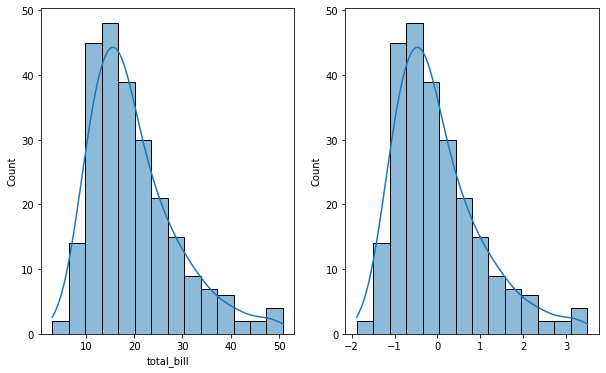

In [68]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.histplot(df['total_bill'], kde=True)
plt.subplot(1,2,2)
sns.histplot(normalized_data, kde=True)

In [70]:
# we can do the above using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [72]:
scaler.fit(df[['total_bill']])

StandardScaler()

In [73]:
scaler.transform(df[["total_bill"]])

array([[-3.14711305e-01],
       [-1.06323531e+00],
       [ 1.37779900e-01],
       [ 4.38315103e-01],
       [ 5.40744704e-01],
       [ 6.19536705e-01],
       [-1.23995452e+00],
       [ 7.98507107e-01],
       [-5.34203307e-01],
       [-5.63468908e-01],
       [-1.07111451e+00],
       [ 1.74175992e+00],
       [-4.91430507e-01],
       [-1.52624903e-01],
       [-5.57840908e-01],
       [ 2.01939101e-01],
       [-1.06436091e+00],
       [-3.93503306e-01],
       [-3.16962505e-01],
       [ 9.72582994e-02],
       [-2.10030504e-01],
       [ 5.67366990e-02],
       [-4.52034507e-01],
       [ 2.21000952e+00],
       [ 3.83349840e-03],
       [-2.22412104e-01],
       [-7.22178510e-01],
       [-7.98719310e-01],
       [ 2.15446301e-01],
       [-1.53017018e-02],
       [-1.15215771e+00],
       [-1.61629703e-01],
       [-5.31952107e-01],
       [ 1.01760699e-01],
       [-2.25788904e-01],
       [ 4.81087904e-01],
       [-3.91252106e-01],
       [-3.21464905e-01],
       [-1.2

In [74]:
pd.DataFrame(scaler.fit_transform(df[['total_bill', 'tip']]), columns=['total_bill', 'tip'])

,total_bill,tip
0,-0.314711,-1.439947
1,-1.063235,-0.969205
2,0.137780,0.363356
3,0.438315,0.225754
4,0.540745,0.443020
...,...,...
239,1.040511,2.115963
240,0.832275,-0.722971
241,0.324630,-0.722971
242,-0.221287,-0.904026


In [76]:
#new values
scaler.transform([[13,17]])

c:\Users\srsss\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array([[-0.76382571, 10.14029677]])

## Normalization--Min Max Scaler

In [78]:
df=sns.load_dataset('taxis')
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [77]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()

In [79]:
min_max.fit_transform(df[['distance','fare','tip']])

array([[0.04359673, 0.04026846, 0.06475904],
       [0.02152589, 0.02684564, 0.        ],
       [0.0373297 , 0.04362416, 0.07108434],
       ...,
       [0.11280654, 0.10067114, 0.        ],
       [0.03051771, 0.03355705, 0.        ],
       [0.10490463, 0.09395973, 0.10120482]])

## Unit Vector

In [81]:
from sklearn.preprocessing import normalize

In [82]:
pd.DataFrame(normalize(df[['distance','fare','tip']]))

,0,1,2
0,0.213461,0.933894,0.286839
1,0.156064,0.987747,0.000000
2,0.171657,0.939731,0.295702
3,0.267899,0.939386,0.213971
4,0.231742,0.965592,0.118017
...,...,...,...
6428,0.160133,0.960800,0.226322
6429,0.307453,0.951563,0.000000
6430,0.250500,0.968117,0.000000
6431,0.183497,0.983020,0.000000


## Data Encoding

1. Nominal/OHE Encoding
2. Label and Ordinal Encoding
3. Target Guided Ordinal Encoding 

### Nominal/OHE Encoding
One hot encoding, also known as nominal encoding, is a technique used to represent categorical data as numerical data, which is more suitable for machine learning algorithms. In this technique, each category is represented as a binary vector where each bit corresponds to a unique category. For example, if we have a categorical variable "color" with three possible values (red, green, blue), we can represent it using one hot encoding as follows:

1. Red: [1, 0, 0]
2. Green: [0, 1, 0]
3. Blue: [0, 0, 1]

In [84]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [86]:
## Create a simple dataframe 
df = pd.DataFrame({
    'color': ['red', 'blue', 'green', 'green', 'red', 'blue']
})

df.head()

,color
0,red
1,blue
2,green
3,green
4,red


In [88]:
## perform fit and transform
encoded = ohe.fit_transform(df[['color']]).toarray()

In [91]:
encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out())

encoded_df.head()

,color_blue,color_green,color_red
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,0.0,1.0


In [92]:
ohe.transform([['green']]).toarray()

c:\Users\srsss\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  "X does not have valid feature names, but"


array([[0., 1., 0.]])

In [95]:
pd.concat([df, encoded_df], axis=1)

,color,color_blue,color_green,color_red
0,red,0.0,0.0,1.0
1,blue,1.0,0.0,0.0
2,green,0.0,1.0,0.0
3,green,0.0,1.0,0.0
4,red,0.0,0.0,1.0
5,blue,1.0,0.0,0.0


### Label Encoding 
Label encoding and ordinal encoding are two techniques used to encode categorical data as numerical data.

Label encoding involves assigning a unique numerical label to each category in the variable. The labels are usually assigned in alphabetical order or based on the frequency of the categories. For example, if we have a categorical variable "color" with three possible values (red, green, blue), we can represent it using label encoding as follows:

1. Red: 1
2. Green: 2
3. Blue: 3

In [96]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [100]:
encoded = label_encoder.fit_transform(df[["color"]])
encoded

c:\Users\srsss\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([2, 0, 1, 1, 2, 0])

In [101]:
label_encoder.transform([['blue']])

c:\Users\srsss\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0])

### Ordinal Encoding
It is used to encode categorical data that have an intrinsic order or ranking. In this technique, each category is assigned a numerical value based on its position in the order. For example, if we have a categorical variable "education level" with four possible values (high school, college, graduate, post-graduate), we can represent it using ordinal encoding as follows:

1. High school: 1
2. College: 2
3. Graduate: 3
4. Post-graduate: 4

In [102]:
from sklearn.preprocessing import OrdinalEncoder


In [103]:
df = pd.DataFrame(
    {
        "size" : ['small', 'medium', 'large', 'medium', 'small', 'large']
    }
)

df

,size
0,small
1,medium
2,large
3,medium
4,small
5,large


In [104]:
ordinal_encoder = OrdinalEncoder(categories=[['small', 'medium', 'large']])

In [105]:
ordinal_encoder.fit_transform(df[["size"]])

array([[0.],
       [1.],
       [2.],
       [1.],
       [0.],
       [2.]])

In [108]:
ordinal_encoder.transform([['large']])

c:\Users\srsss\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  "X does not have valid feature names, but"


array([[2.]])

## Target Guided Ordinal Encoding 
It is a technique used to encode categorical variables based on their relationship with the target variable. This encoding technique is useful when we have a categorical variable with a large number of unique categories, and we want to use this variable as a feature in our machine learning model.

In Target Guided Ordinal Encoding, we replace each category in the categorical variable with a numerical value based on the mean or median of the target variable for that category. This creates a monotonic relationship between the categorical variable and the target variable, which can improve the predictive power of our model.

In [110]:
import pandas as pd

# create a sample dataframe with a categorical variable and a target variable
df = pd.DataFrame({
    'city': ['New York', 'London', 'Paris', 'Tokyo', 'New York', 'Paris'],
    'price': [200, 150, 300, 250, 180, 320]
})

df

,city,price
0,New York,200
1,London,150
2,Paris,300
3,Tokyo,250
4,New York,180
5,Paris,320


In [121]:
mean_price = df.groupby('city')['price'].mean().to_dict()

mean_price

{'London': 150, 'New York': 190, 'Paris': 310, 'Tokyo': 250}

In [125]:
df['city_encoded']=df['city'].map(mean_price)

df

,city,price,city_encoded
0,New York,200,190
1,London,150,150
2,Paris,300,310
3,Tokyo,250,250
4,New York,180,190
5,Paris,320,310


In [126]:
import seaborn as sns
sns.load_dataset('tips')

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## Covariance And Correlation

In [2]:
import seaborn as sns
df = sns.load_dataset('healthexp')
df

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9
...,...,...,...,...
269,2020,Germany,6938.983,81.1
270,2020,France,5468.418,82.3
271,2020,Great Britain,5018.700,80.4
272,2020,Japan,4665.641,84.7


In [3]:
##covariance
df.cov()

,Year,Spending_USD,Life_Expectancy
Year,201.098848,2.571883e+04,41.915454
Spending_USD,25718.827373,4.817761e+06,4166.800912
Life_Expectancy,41.915454,4.166801e+03,10.733902


In [4]:
df.corr(method='pearson')

,Year,Spending_USD,Life_Expectancy
Year,1.000000,0.826273,0.902175
Spending_USD,0.826273,1.000000,0.579430
Life_Expectancy,0.902175,0.579430,1.000000


In [5]:
##spearman rank correlation
df.corr(method='spearman')

,Year,Spending_USD,Life_Expectancy
Year,1.000000,0.931598,0.896117
Spending_USD,0.931598,1.000000,0.747407
Life_Expectancy,0.896117,0.747407,1.000000


In [11]:
df=sns.load_dataset('flights')
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [12]:
df.corr()

,year,passengers
year,1.000000,0.921824
passengers,0.921824,1.000000


In [13]:
df=sns.load_dataset('tips')
df.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [14]:
df.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000
